## Preliminary Steps

### Organization of Datasets

Datasets are nearly always constructed and displayed so that variables are in columns and observations are in rows. We will illustrate this with home values in West Roxbury, Boston, in 2014. 

* 14 variables are recorded for over 5000 homes.

* The spreadsheet is organized so that each row represents a home (record/observation).

*  In supervised learning, one of these variables will be the outcome variable, typically listed in the first or last column (in this case it is `TOTAL VALUE`, in the first column).

### Predicting Home Values in the West Roxbury Neighborhood

The Internet has revolutionized the real estate industry. Realtors now list houses and their prices on the web, and estimates of house and condominium prices have become widely available, even for units not on the market. Zillow (www.zillow.com) is one of the most popular online real estate information sites in the United States, and in 2014 they purchased their major rival, Trulia. By 2015, Zillow had become the dominant platform for checking house prices and, as such, the dominant online advertising venue for realtors. What used to be a comfortable 6% commission structure for realtors, affording them a handsome surplus (and an oversupply of realtors), was being rapidly eroded by an increasing need to pay for advertising on Zillow. 

Zillow gets much of the data for its “Zestimates” of home values directly from publicly available city housing data, used to estimate property values for tax assessment. A competitor seeking to get into the market would likely take the same approach. So might realtors seeking to develop an alternative to Zillow.

A simple approach would be a naive, model-less method—just use the assessed values as determined by the city. Those values, however, do not necessarily include all properties, and they might not include changes warranted by *remodeling*, *additions*, and so on. Moreover, the assessment methods used by cities may not be transparent or always reflect true market values. However, the **city property data** can be used as a starting point to build a model, to which additional data (such as that collected by large realtors) can be added later.

Let’s look at how Boston property assessment data, available from the city of Boston, might be used to **predict home values**. The data in **WestRoxbury.csv** includes information on single family owner-occupied homes in West Roxbury, a neighborhood in southwest Boston, MA, in 2014. The data include values for various predictor variables, and for an outcome—**assessed home value** (`Total Value`). This dataset has 14 variables and includes 5802 homes. 

As we saw earlier, below the header row, each row in the data represents a home. For example, the first home was assessed at a total value of \$344.2K (`TOTAL VALUE`). Its tax bill was $4330. It has a lot size of 9965 square feet, was built in the year 1880, has two floors, six rooms, and so on.

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import r2_score
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression 

In [2]:
print(np.__version__)

print(pd.__version__)

1.26.3
2.2.0


In [8]:
housing_df = pd.read_csv('data/WestRoxbury.csv')
# show the top 5 rows of the dataframe
housing_df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN


In [5]:
housing_df.shape

(5802, 14)

#### Cleanup

Preprocessing and cleaning up data is an important aspect of data analysis. 

Show the column names.

In [6]:
housing_df.columns

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

Note that some column titles end with spaces and some consist of two space separated words. For further analysis it's more convenient to have column names which are single words. 

In the rename command you can specify individual columns by name and provide their new name using a dictionary. Note that we use the `inplace` argument here. This means that the data frame is modified directly. By default, the modification is done on a copy and the copy returned by the method.

In [7]:
housing_df = housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'})
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

We therefore strip trailing spaces and replace the remaining spaces with an underscore _. Instead of using the `rename` method, we create a **modified copy** of `columns` and **assign** to the `columns` field of the dataframe.

The `strip()` method is used to remove leading and trailing whitespaces (spaces, tabs, and newline characters) from a string.

In [8]:
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns] # list comprehension
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

#### Accessing subsets of the data

Pandas uses two methods to access rows in a data frame; `loc` and `iloc`. The `loc` method (explicit indexing) is more general and allows accessing rows using labels. The `iloc` method (implicit indexing) on the other hand only allows using integer numbers. To specify a range of rows use the slice notation, e.g. `0:9`.

<div class='alert alert-info'>Recall that in contrast to R, Python uses 0-indexing, which means that indices start at 0 and not at 1.</div>

To show the first four rows of the data frame, you can use the following commands.

In [9]:
housing_df.loc[0:3]  # for loc, the second index in the slice is inclusive

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN


In [10]:
housing_df.iloc[0:4]  # for loc, the second index in the slice is exclusive

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN


Note the difference in the two methods with respect to the slice notation! 

For consistency with how slices are defined in Python, we will use the `iloc` method mostly from here on.

Next, show the first ten rows of the first column

In [11]:
housing_df['TOTAL_VALUE'].iloc[0:10]
housing_df.iloc[0:10]['TOTAL_VALUE']  # the order is not important
housing_df.iloc[0:10].TOTAL_VALUE

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

Show the fifth row of the first 10 columns. 

The `iloc` methods allows specifying the rows and columns within one set of brackets. `dataframe.iloc[rows, columns]`

In [12]:
housing_df.iloc[4][0:10]
housing_df.iloc[4, 0:10]  # this is equivalent

TOTAL_VALUE    331.5
TAX             4170
LOT_SQFT        5000
YR_BUILT        1910
GROSS_AREA      2370
LIVING_AREA     1438
FLOORS           2.0
ROOMS              7
BEDROOMS           3
FULL_BATH          2
Name: 4, dtype: object

If you prefer to preserve the dataframe format, use a slice for the rows as well.

In [13]:
housing_df.iloc[4:5, 0:10]

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2


Use the `pd.concat` method if you want to combine non-consecutive columns into a new data frame. 

The `axis` argument specifies the dimension along which the concatenation happens, 0=rows, 1=columns.

In [14]:
pd.concat([housing_df.iloc[4:6,0:2], housing_df.iloc[4:6,4:6]], axis=1)

,TOTAL_VALUE,TAX,GROSS_AREA,LIVING_AREA
4,331.5,4170,2370,1438
5,337.4,4244,2124,1060


To specify a full column, use the `:` on its own.
```
housing_df.iloc[:,0:1]
```
A often more practical way is to use the column name as follows

In [15]:
housing_df['TOTAL_VALUE']

0       344.2
1       412.6
2       330.1
3       498.6
4       331.5
        ...  
5797    404.8
5798    407.9
5799    406.5
5800    308.7
5801    447.6
Name: TOTAL_VALUE, Length: 5802, dtype: float64

We can subset the column using a slice

In [16]:
housing_df['TOTAL_VALUE'][0:10]

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

Pandas provides a number of ways to access statistics of the columns.

In [17]:
print('Number of rows ', len(housing_df['TOTAL_VALUE']))
print('Mean of TOTAL_VALUE ', housing_df['TOTAL_VALUE'].mean())

Number of rows  5802
Mean of TOTAL_VALUE  392.6857149258877


A data frame also has the method `describe` that prints a number of common statistics 

In [18]:
housing_df['TOTAL_VALUE'].describe()

count    5802.000000
mean      392.685715
std        99.177414
min       105.000000
25%       325.125000
50%       375.900000
75%       438.775000
max      1217.800000
Name: TOTAL_VALUE, dtype: float64

In [19]:
housing_df.describe()

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


#### Sampling from a Database

Typically, we perform data mining on less than the complete database. Data mining algorithms will have varying limitations on what they can handle in terms of the numbers of observations and variables, limitations that may be specific to computing power and capacity as well as software limitations. Even within those limits, many algorithms will execute faster with smaller samples.

Accurate models can often be built with as few as several thousand observations. Hence, we will want to sample a subset of observations for model building.

Use the `sample` method to retrieve a random sample of observations. 
Here we sample 5 observations without replacement.

In [20]:
housing_df.sample(5)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
4897,437.0,5497,4560,1890,3378,2039,2.0,8,4,1,1,1,1,NaN
5274,346.3,4356,5000,1920,1890,1152,2.0,6,3,1,0,1,1,NaN
5599,367.9,4628,5792,1938,3357,1449,1.0,7,4,1,0,1,1,NaN
5615,329.2,4141,4720,1932,2346,1281,1.5,6,2,1,1,1,1,Old
3016,491.9,6188,8950,1865,3112,1872,2.0,6,2,1,1,1,0,Recent


If the event we are interested in classifying is **rare**, for example, customers puchasing a product in response to a mailing, or fraudulent credit card transactions, sampling a random subset of records may yield so few events (e.g., purchases) that we have little information on them. We would end up with lots of data
on nonpurchasers and non-fraudulent transactions but little on which to base a model that distinguishes purchasers from nonpurchasers or fraudulent from nonfraudulent. In such cases, we would want our sampling procedure to **overweight the rare class** (purchasers or frauds) relative to the majority class (nonpurchasers, non-frauds) so that our sample would end up with a healthy complement of purchasers or frauds.



The `sample` method allows to specify weights for the individual rows. We use this here to oversample houses with over 10 rooms.

In [21]:
weights = [0.9 if rooms > 10 else 0.01 for rooms in housing_df.ROOMS]
housing_df.sample(5, weights=weights)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
884,383.8,4828,13100,1950,3282,1398,1.0,8,5,3,0,1,0,NaN
4051,626.3,7878,12169,1913,5751,2942,2.0,12,6,1,2,1,1,Old
4277,538.0,6768,8348,1964,3218,1914,2.0,14,4,2,2,1,1,NaN
4663,409.5,5151,5397,1965,2455,1530,2.0,6,3,1,1,1,2,Recent
4179,1009.9,12704,13300,2010,7624,4133,2.0,9,4,3,1,1,2,NaN


In [22]:
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

The `REMODEL` column is a factor, so we need to change it's type.

In [23]:
housing_df.REMODEL.unique()

array([nan, 'Recent', 'Old'], dtype=object)

In [24]:
print(housing_df.REMODEL.dtype)
housing_df.REMODEL = housing_df.REMODEL.astype('category')
print(housing_df.REMODEL.cat.categories)  # it can take one of three levels
print(housing_df.REMODEL.dtype)  # type is now 'category'

object
Index(['Old', 'Recent'], dtype='object')
category


Other columns also have types.

In [25]:
print(housing_df.BEDROOMS.dtype)  # BEDROOMS is an integer variable
print(housing_df.TOTAL_VALUE.dtype)  # Total_Value is a numeric variable

int64
float64


It's also possible to the all columns data types

In [26]:
housing_df.dtypes

TOTAL_VALUE     float64
TAX               int64
LOT_SQFT          int64
YR_BUILT          int64
GROSS_AREA        int64
LIVING_AREA       int64
FLOORS          float64
ROOMS             int64
BEDROOMS          int64
FULL_BATH         int64
HALF_BATH         int64
KITCHEN           int64
FIREPLACE         int64
REMODEL        category
dtype: object

In [27]:
housing_df

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,NaN
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,NaN
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,NaN


Pandas provides a method to convert factors into dummy variables (**one-hot encoding**). In older versions of pandas, the missing values were treated as a separate category. We removed the first dummy variable. With newer versions of pandas, we can now call `get_dummies` with the default value of `drop_first=False`. 

In [28]:
# the missing values will create a third category
# use the arguments drop_first and dummy_na to control the outcome
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=False, dtype=int)
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL_Old', 'REMODEL_Recent'],
      dtype='object')

In [29]:
print(housing_df.loc[:, 'REMODEL_Old':'REMODEL_Recent'].head(5))

   REMODEL_Old  REMODEL_Recent
0            0               0
1            0               1
2            0               0
3            0               0
4            0               0


To illustrate missing data procedures, we first convert a few entries for bedrooms to NA's. Then we impute these missing values using the median of the remaining values.

In [30]:
print('Number of rows with valid BEDROOMS values before: ', 
      housing_df['BEDROOMS'].count()) 
missingRows = housing_df.sample(10).index
housing_df.loc[missingRows, 'BEDROOMS'] = np.nan
print('Number of rows with valid BEDROOMS values after setting to NAN: ', 
      housing_df['BEDROOMS'].count()) 
housing_df['BEDROOMS'].count()

Number of rows with valid BEDROOMS values before:  5802
Number of rows with valid BEDROOMS values after setting to NAN:  5792


5792

#### Outliers 

The more data we are dealing with, the greater the chance of encountering erroneous values resulting from measurement error, data-entry error, or the like. If the erroneous value is in the same range as the rest of
the data, it may be harmless. If it is well outside the range of the rest of the data (e.g., a misplaced decimal), it may have a substantial effect on some of the data mining procedures we plan to use.


Values that lie far away from the bulk of the data are called outliers. The term far away is deliberately left vague because what is or is not called an outlier is an arbitrary decision. Analysts use rules of thumb such as “**anything over three standard deviations away from the mean is an outlier**,” but no statistical rule can
tell us whether such an outlier is the result of an error. In this statistical sense, an outlier is not necessarily an invalid data point, it is just a distant one.

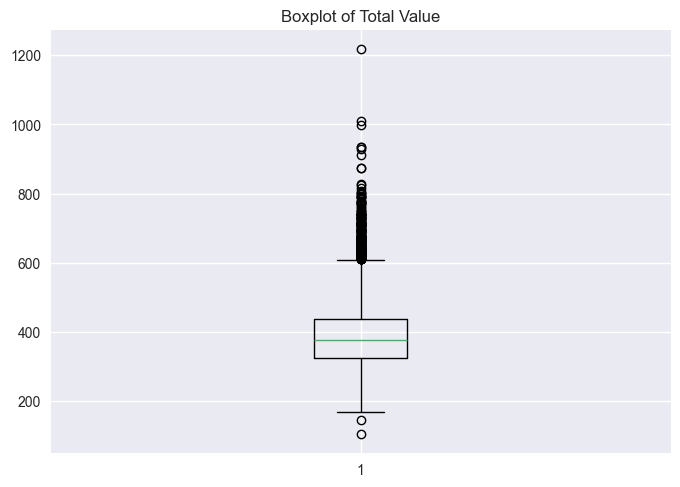

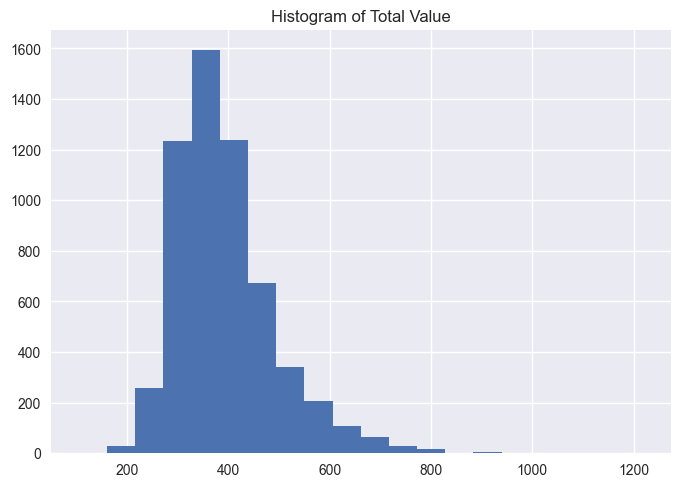

In [74]:
plt.style.use('seaborn-v0_8')
plt.boxplot(housing_df['TOTAL_VALUE'])
plt.title('Boxplot of Total Value')
plt.show()

plt.hist(housing_df['TOTAL_VALUE'], bins=20)
plt.title('Histogram of Total Value')
plt.show()

#### Missing Values 
Typically, some observations will contain missing values. If the number of observations with missing values is small, those observations might be omitted. However, if we have a large number of variables, even a small proportion of
missing values can affect a lot of observations. Even with only 30 variables, if only 5% of the values are missing (spread randomly and independently among cases and variables), almost 80% of the observations would have to be omitted from the analysis. (The chance that a given record would escape having a missing value is
$0.95^{30} = 0.215$.)

In [32]:
# remove rows with missing values 
reduced_df = housing_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  5792


Replace the missing values using the median of the remaining values.

By default, the `median` method of a pandas dataframe ignores NA values.

In [33]:
medianBedrooms = housing_df['BEDROOMS'].median()
housing_df.BEDROOMS = housing_df.BEDROOMS.fillna(value=medianBedrooms)
print('Number of rows with valid BEDROOMS values after filling NA values: ',
      housing_df['BEDROOMS'].count())

Number of rows with valid BEDROOMS values after filling NA values:  5802


#### Normalizing (standardizing) and rescaling data

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = housing_df.copy()

# normalizing a data frame

# pandas:
norm_df = (housing_df - housing_df.mean()) / housing_df.std()

# scikit-learn: 
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(housing_df), 
                       index=housing_df.index, columns=housing_df.columns)
# the result of the transformation is a numpy array, we convert it into a dataframe

# rescaling a data frame
# pandas:
rescaled_df = (housing_df - housing_df.min()) / (housing_df.max() - housing_df.min())

# scikit-learn:
scaler = MinMaxScaler()
rescaled_df = pd.DataFrame(scaler.fit_transform(housing_df), 
                       index=housing_df.index, columns=housing_df.columns)

The standardization of the dataset may give a <code>DataConversionWarning</code>. This informs you that the integer columns in the dataframe are automatically converted to real numbers (<code>float64</code>). This is expected and you can therefore ignore this warning. If you want to suppress the warning, you can explicitly convert the integer columns to real numbers</p>
<pre>
# Option 1: Identify all integer columns, remove personal loan, 
# and change their type
intColumns = [c for c in housing_df.columns if housing_df[c].dtype == 'int']
housing_df[intColumns] = housing_df[intColumns].astype('float64')
</pre>
Alternatively, you can suppress the warning as follows:
<pre>
# Option 2: use the warnings package to suppress the display of the warning
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    norm_df = pd.DataFrame(scaler.fit_transform(housing_df), 
                       index=housing_df.index, columns=housing_df.columns)    
</pre>

Split the dataset into training (70%) and validation (30%) sets. Randomly sample 70% of the dataset into a new data frame `trainData`. The remaining 30% serve as validation.

In [35]:
# random_state is set to a defined value to get the same partitions when re-running the code
trainData= housing_df.sample(frac=0.7, random_state=1)
# assign rows that are not already in the training set, into validation 
validData = housing_df.drop(trainData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print()

# alternative way using scikit-learn
trainData, validData = train_test_split(housing_df, test_size=0.3, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (4061, 15)
Validation :  (1741, 15)

Training   :  (4061, 15)
Validation :  (1741, 15)


Partition the dataset into training (50%), validation (30%), and test sets (20%). 

In [36]:
# randomly sample 50% of the row IDs for training
trainData = housing_df.sample(frac=0.5, random_state=1)

# sample 30% of the row IDs into the validation set, drawing only from records
# not already in the training set; 60% of 50% is 30%
validData = housing_df.drop(trainData.index).sample(frac=0.6, random_state=1)  
# the remaining 20% rows serve as test
testData = housing_df.drop(trainData.index).drop(validData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)
print()

# alternative way using scikit-learn
trainData, temp = train_test_split(housing_df, test_size=0.5, random_state=1)
validData, testData = train_test_split(temp, test_size=0.4, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)

Training   :  (2901, 15)
Validation :  (1741, 15)
Test       :  (1160, 15)

Training   :  (2901, 15)
Validation :  (1740, 15)
Test       :  (1161, 15)


The `statsmodels` package allows to fit linear regression models. We construct a formula excluding the dependent variable and the `TAX` column

In [37]:
# data loading and preprocessing
housing_df = pd.read_csv('data/WestRoxbury.csv')
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=False, dtype=int)

excludeColumns = ('TOTAL_VALUE', 'TAX')
predictors = [s for s in housing_df.columns if s not in excludeColumns]
outcome = 'TOTAL_VALUE'

# partition data
X = housing_df[predictors]
y = housing_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

# initialize the model
model = LinearRegression()
# fit the model using training data ONLY
model.fit(train_X, train_y)

# evaluate the model using training data
train_pred = model.predict(train_X)
train_results = pd.DataFrame({
    'TOTAL_VALUE': train_y, 
    'predicted': train_pred, 
    'residual': train_y - train_pred
})
print(train_results.head())

      TOTAL_VALUE   predicted   residual
5020        418.7  425.384218  -6.684218
2534        493.8  471.122555  22.677445
120         620.3  662.767679 -42.467679
5180        399.9  402.074304  -2.174304
3990        441.0  430.255206  10.744794


Text(0.5, 1.0, 'Training Residuals')

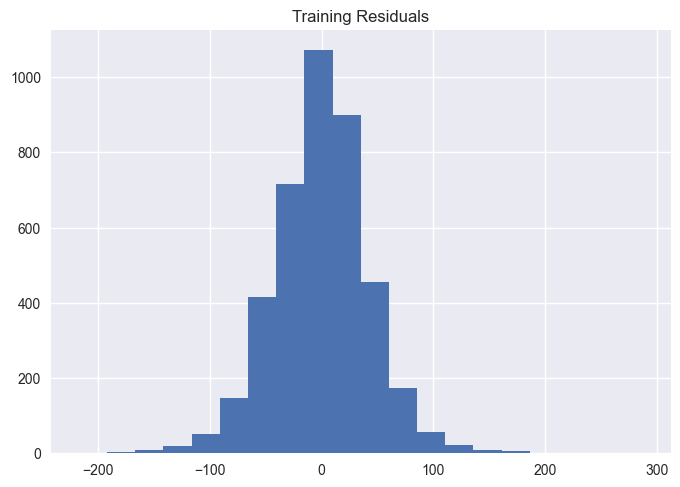

In [38]:
plt.style.use('seaborn-v0_8')
plt.hist(train_results.residual, bins=20)
plt.title('Training Residuals')

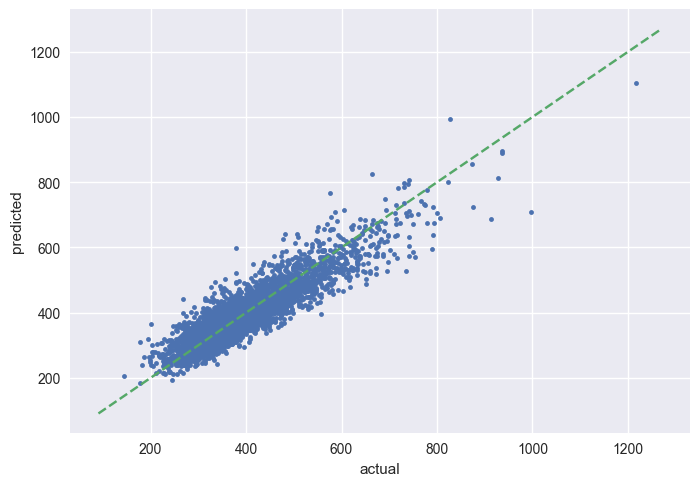

In [39]:
plt.plot(train_results.TOTAL_VALUE, train_results.predicted, '.')
plt.xlabel('actual')     # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

Predict the validation data

In [40]:
# evaluate the model using validation data
valid_pred = model.predict(valid_X)
valid_results = pd.DataFrame({
    'TOTAL_VALUE': valid_y, 
    'predicted': valid_pred, 
    'residual': valid_y - valid_pred
})
print(valid_results.head())

      TOTAL_VALUE   predicted   residual
1822        462.0  407.534738  54.465262
1998        370.4  361.873336   8.526664
5126        407.4  389.525456  17.874544
808         316.1  383.179402 -67.079402
4034        393.2  433.015993 -39.815993


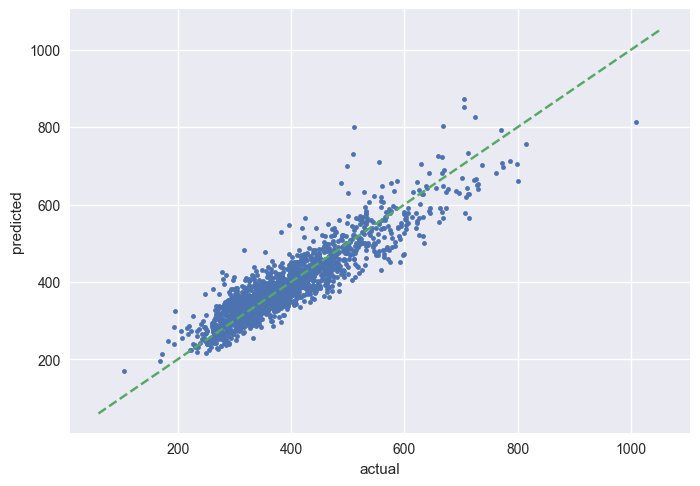

In [41]:
plt.plot(valid_results.TOTAL_VALUE, valid_results.predicted, '.')
plt.xlabel('actual')     # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

We can use the **metrics** that scikit-learn provides.

In [42]:
print('Training set r2: ', r2_score(train_results.TOTAL_VALUE, train_results.predicted))
print('Validation set r2: ', r2_score(valid_results.TOTAL_VALUE, valid_results.predicted))

Training set r2:  0.8103717353634718
Validation set r2:  0.8194720334039023


In [43]:
new_data = pd.DataFrame({
    'LOT_SQFT': [4200, 6444, 5035],
    'YR_BUILT': [1960, 1940, 1925],
    'GROSS_AREA': [2670, 2886, 3264],
    'LIVING_AREA': [1710, 1474, 1523],
    'FLOORS': [2.0, 1.5, 1.9],
    'ROOMS': [10, 6, 6],
    'BEDROOMS': [4, 3, 2],
    'FULL_BATH': [1, 1, 1],
    'HALF_BATH': [1, 1, 0],
    'KITCHEN': [1, 1, 1],
    'FIREPLACE': [1, 1, 0],
    'REMODEL_Old': [0, 0, 0],
    'REMODEL_Recent': [0, 0, 1],
})
print(new_data)
print()

print('Predictions: ', model.predict(new_data))

   LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  ROOMS  BEDROOMS  \
0      4200      1960        2670         1710     2.0     10         4   
1      6444      1940        2886         1474     1.5      6         3   
2      5035      1925        3264         1523     1.9      6         2   

   FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE  REMODEL_Old  REMODEL_Recent  
0          1          1        1          1            0               0  
1          1          1        1          1            0               0  
2          1          0        1          0            0               1  

Predictions:  [385.10514246 378.92036033 385.00745316]


### Precitive Power and Overfitting

In supervised learning, a key question presents itself: How well will our prediction or classification model perform when we apply it to new data? We are particularly interested in comparing the performance of various models so that we can choose the one we think will do the best when it is implemented in practice. A key concept is to make sure that our chosen model **generalizes** beyond the dataset that we have at hand. To assure generalization, we use the concept of *data partitioning* and try to avoid *overfitting*. These two important concepts are described next.


#### Overfitting

The more variables we include in a model, the greater the risk of overfitting the particular data used for modeling. What is overfitting?

Below we show **hypothetical data** about **advertising expenditures** in one time period and **sales** in a subsequent time period. 

* A scatter plot of the data is shown. 
* We could connect up these points with a smooth but complicated function, one that **interpolates** all these data points perfectly and leaves no error (residuals). 

* However, we can see that such a curve is unlikely to be accurate, or even useful, in predicting future sales on the basis of advertising expenditures.

* For instance, it is hard to believe that increasing expenditures from $400 to $500 will actually decrease revenue.


In [44]:
df = pd.DataFrame({'Expenditure': [239, 364,602, 644, 770, 789, 911], 
                   'Revenue': [514, 789, 550, 1386, 1394, 1440, 1354]})
df

,Expenditure,Revenue
0,239,514
1,364,789
2,602,550
3,644,1386
4,770,1394
5,789,1440
6,911,1354


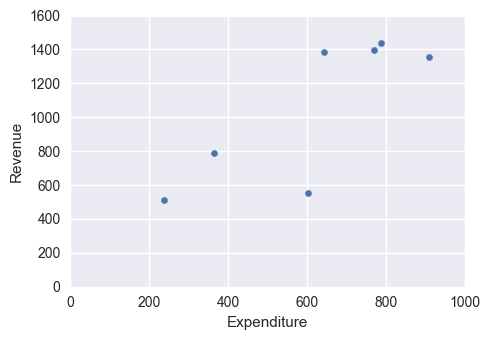

In [45]:
df.plot.scatter(x='Expenditure', y='Revenue', xlim=(0, 1000), ylim=(0, 1600), figsize=(5, 3.5))
plt.tight_layout()  # increase the separation between the plots
plt.show()

In [46]:
x = list(df.Expenditure)
y = list(df.Revenue)

from scipy import interpolate
f = interpolate.PchipInterpolator(x, y)

# generate 100 points between the minimum and maximum values of x
x_new = np.linspace(x[0], x[-1], 100)
# evaluate the function at the new points
y_new = [f(xi) for xi in x_new]

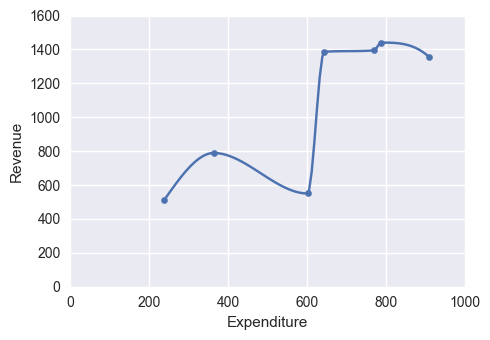

In [47]:
df.plot.scatter(x='Expenditure', y='Revenue', xlim=(0, 1000), ylim=(0, 1600), figsize=(5, 3.5))
# plot the interpolated curve
plt.plot(x_new, y_new)
plt.tight_layout()  # Increase the separation between the plots
plt.show()

#### Convert categorical variables to numerical (alternative one-hot encoding)

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
housing_df = pd.read_csv('data/WestRoxbury.csv')
housing_df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN


In [29]:
encoder = OrdinalEncoder()
housing_df['REMODEL'].fillna('UN', inplace=True)
housing_df[['REMODEL']] = encoder.fit_transform(housing_df[['REMODEL']])
housing_df.head(10)

/var/folders/6_/z43lx4js3ts_4n_45ns9y9y80000gn/T/ipykernel_30211/2327194845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df['REMODEL'].fillna('UN', inplace=True)


,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,2.0
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,1.0
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,2.0
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,2.0
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,2.0
5,337.4,4244,5142,1950,2124,1060,1.0,6,3,1,0,1,1,0.0
6,359.4,4521,5000,1954,3220,1916,2.0,7,3,1,1,1,0,2.0
7,320.4,4030,10000,1950,2208,1200,1.0,6,3,1,0,1,0,2.0
8,333.5,4195,6835,1958,2582,1092,1.0,5,3,1,0,1,1,1.0
9,409.4,5150,5093,1900,4818,2992,2.0,8,4,2,0,1,0,2.0
